## Limitations of Expectation

Consider the Robot Javelin championships, as presented in the Jane Street Puzzle December 2025:
> *  It’s head-to-head. Each of two robots makes their first throw, whose distance is a real number drawn uniformly from [0, 1].
> *  Then, without knowledge of their competitor’s result, each robot decides whether to keep their current distance or erase it and go for a second throw, whose distance they must keep (it is also drawn uniformly from [0, 1]).
> *  The robot with the larger final distance wins.

What is the optimal distance $z$ the competitors should use to decide whether to rethrow their javelin? I would assume that the value of $z$ which maximises the expected throw length would be the answer. After all, that would mean _on average_ your throw will be as long as possible. This can be calculated as a function of $z$, where the competitor's attempt is represented by the Random Variable $X$:
$$\begin{align} \mathbb{E}(X) &= \mathbb{P}(X < z) \: \mathbb{E}\left( U([0, z]) \right) +  \mathbb{P}(X > z) \: \mathbb{E}\left( U([z, 1]) \right) \\
\mathbb{E}(X) &= \frac{z^3}{2} + \frac{1}{2}(1- z^2) (1+z) \\
&= \frac{1}{2} (1+ z- z^2)\end{align}$$

This function can then be maximised by searching for its stationary points. Calculating its derivative gives
$$\begin{align} \frac{d \mathbb{E}(X)}{dz} &= \frac{1}{2} (1+ 2z), \end{align}$$
and setting the derivative equal to zero produces a positive root of $z = \frac{1}{2} $. Thus the strategy to maximise the expected throw length is to rethrow the javelin if it fails to surpass the halfway mark. Sounds sensible. Furthermore, the expected value is calculated simply by passing the value $z = \frac{1}{2}$ into the function for $\mathbb{E}(X)$, and is equal to $ \frac{5}{8} = 0.625 $. 


To summarise, a player of the javelin game using a threshold $x$ is represented by a random variable $X: \Omega \rightarrow [0, 1]$ which takes the values,
$$ 
\mathbb{P}(X \in A) = \begin{cases}
x^2 , & \text{for} \: A= [ 0, x] \\
(1-x^2) , & \text{for} \: A= [x, 1].
\end{cases}
$$


### Simulation

In [1]:
import numpy
import math
import random

def strategy(threshold):
    throw1 = random.uniform(0,1)
    if throw1 >= threshold:
        return throw1
    else:
        return random.uniform(0,1)

def simulate_x_throws(x, func, threshold):
    data = numpy.zeros(x)
    for i in range(x):
        data[i] = func(threshold)
    return data



Using the value calculated above as the threshold value for the game, let us see how it could play out. Averaging over 10,000 attempts what is the average throw length?

In [2]:
N = 10000
single_player_logic = 0.5
solo_throws = simulate_x_throws(N, strategy, single_player_logic)
print(f"The mean throw length is: {numpy.mean(solo_throws)}")

The mean throw length is: 0.6223237350680305


The value is within acceptable error to the theoretical value calculated above, so everything appears to be working correctly. But now lets introduce the idea that this game has multiple players. If you decide to use a strategy of maximising your Expectation, then I will beat you more often than not by using a slightly higher threshold value. Lets simulate this idea before delving into the mathematics again.

In [3]:
a_far_superior_threshold = 0.55
competing_throws = simulate_x_throws(N, strategy, a_far_superior_threshold)
wins = sum(competing_throws > solo_throws)
print(f"The number of attempts in which my strategy was superior is {wins} out of {N} total ({wins*100/N} percent)")

The number of attempts in which my strategy was superior is 5067 out of 10000 total (50.67 percent)


As you can see, this new strategy seems to reliably win a couple more rounds than our optimal for a single player. As an intelligent agent in this game, you might have run this simulation yourself and thus be tempted to increase the threshold further. How much further will pay off?

## Joint Probabilities

Consider two comptetitors each individually setting a threshold for their strategies. Denote the first player's strategy as $X$ with a threshold of $x$ and the second $Y$ with threshold $y$. This produces a new probability distribution on the space $[0, 1] \times [0, 1]$. As there is no knowledge shared, the game is symmetric and both competitors should use the same threshold. 

Assume $x > y$ and calculate the probability that $X$ wins by splitting the joint probability space into four quadrants. Due to the uniform nature of the probability distribution the quadrants each have constant probability densities which will depend purely on the thresholds chosen. Let us consider one of the easier quadrants first, the set $\lbrace X, Y \: :  \: X > x, Y < y \rbrace$, often denoted $(X >x) \cap (Y < y)$ represents the event that $X$ exceeds its threshold $x$ and $Y$ fails to exceed theirs. With the assumption that $x > y$ we can be sure that if this event, occurs then $X$ will win. Knowing these events are independent,
\begin{align}
\mathbb{P}\left( (X > x) \cap (Y < y) \right) =  \mathbb{P}(X > x) \mathbb{P}(Y < y) = (1 - x^2) y^2.
\end{align}
This event is the easiest because we know that if this event occurs then $X$ beats $Y$ almost surely, the probability $\mathbb{P}\left( (X>Y) \cap  (X > x) \cap (Y < y) \right) = \mathbb{P}\left( (X > x) \cap (Y < y) \right) $. To understand why this makes the problem more simple consider the joint distribution function for $(X, Y)$. This function, based off the uniform distribution, will be constant on each of the quadrants chosen. Picture a two dimensional histogram over the interval $[0, 1] \times [0, 1]$ the height of the bar is the value of the density function and the volume of the bar is equal to the probability. For an example consider the next quadrant: $( X<x) \cap (Y <y)$.

First the probability of the event $( X<x) \cap (Y <y)$ occuring is,
\begin{align}
\mathbb{P}\left( (X < x) \cap (Y < y) \right) =  \mathbb{P}(X < x) \mathbb{P}(Y < y) = x^2y^2.
\end{align}
Calculating the density for this section of the joint distribution function is simple, just divide by the width and breadth of the histogram,
\begin{equation}
\rho(u, v) = \frac{\mathbb{P}\left( (X < x) \cap (Y < y) \right)}{xy} = xy
\end{equation}
Why do we need to bother with a probability density function? Well because when this event occurs there is no guarantee that $X$ is larger than $Y$. Instead the intersection of this set with $(X >Y)$ is calculated by integrating the probability density function (pdf) on $[0, x] \times [0, y]$.
\begin{align}
\mathbb{P}(X>Y) \Big|_{(X <x) \cap (Y <y)} &=  \int_0^y \int_u^x x y \: dv \: du, \\
&= \int_0^y x y (x-u) \: du\\
&= x y (xy - \frac{y^2}{2}).
\end{align}

The full probability density function is given by
\begin{equation}
\rho_{XY}(u, v) = 
\begin{cases} xy, & \text{when} \: (u, v) \in [0, x] \times [0, y], \\
(1+x)y, & \text{when} \: (u, v) \in [x, 1] \times [0, y], \\
x(1+y), & \text{when} \: (u, v) \in [0, x] \times [y, 1], \\
(1+x)(1+y), & \text{when} \: (u, v) \in [x, 1] \times [y, 1]. \\
\end{cases}
\end{equation}

Thus, to calculate probabilities for $(X>x) \cap (Y>y)$,
\begin{align}
\mathbb{P}(X>Y) \Big|_{(X >x) \cap (Y >y)} &= \int_x^1 \int_y^v (1+x)(1+y) \: du \: dv, \\
&= \int_x^1 (1+x)(1+y) (v - y) \: dv, \\
&= (1+x)(1+y) \left( (\frac{1}{2} - y) - (\frac{x^2}{2} - yx) \right), \\
&= (1+x)(1+y) \left( \frac{1}{2} (1-x^2) + y(x-1) \right).
\end{align}

And the final quadrant occurs when $(X <x) \cap (Y > y)$,

\begin{align}
\mathbb{P}(X>Y) \Big|_{(X <x) \cap (Y >y)} &=  \int_y^x \int_y^u x (1+y) \: du \: dv, \\
&= \int_y^x x (1+y) (u-y) \: du\\
&= x (1+y) \left( (\frac{x^2}{2} - xy ) - (\frac{y^2}{2} - y^2) \right), \\
&= \frac{1}{2}x (1+y) (x-y)^2.
\end{align}

To calculate the total probability that $X$ exceeds $Y$ just add up the probabilities for the four quadrants:
 \begin{align} \mathbb{P}(X>Y) &=  \mathbb{P}\left( (X < x) \cap (Y < y) \right) + \mathbb{P}(X>Y) \Big|_{(X <x) \cap (Y <y)} \\ &+ \mathbb{P}(X>Y) \Big|_{(X >x) \cap (Y >y)} + \mathbb{P}(X>Y) \Big|_{(X <x) \cap (Y >y)}. \end{align}
A fair amount of algebraic manipulation later...
$$
\begin{align} \mathbb{P}(X>Y) &= \frac{1}{2} (xy^2 - x^2 - x^2y + xy + x - y + 1).
\end{align}
$$
To maximise this value from the perspective of strategy $X$, it is a matter of calculating the derivative of the expression with respect to $x$, 
$$ \frac{\partial }{\partial x} \mathbb{P}(X > Y)= \frac{1}{2} (y^2 - 2x - 2xy + y + 1). $$
Finding a stationary point then involves setting this equation to zero, however, at this point the symmetry of the problem is invoked, no information being shared between players means that $y = x$, both strategists will look to maximise their theoretical threshold and so naturally they will fall upon the same number. The equation reduces to,
$$ 0 = x^2 + x - 1, $$ 
which has a root at $$ x = \frac{\sqrt{5} - 1}{2} \approx 0.618034.$$

### Visualisation

Let us plot the joint distribution of $(X, Y)$, choices of threshold values correlate to slightly different probability densities.

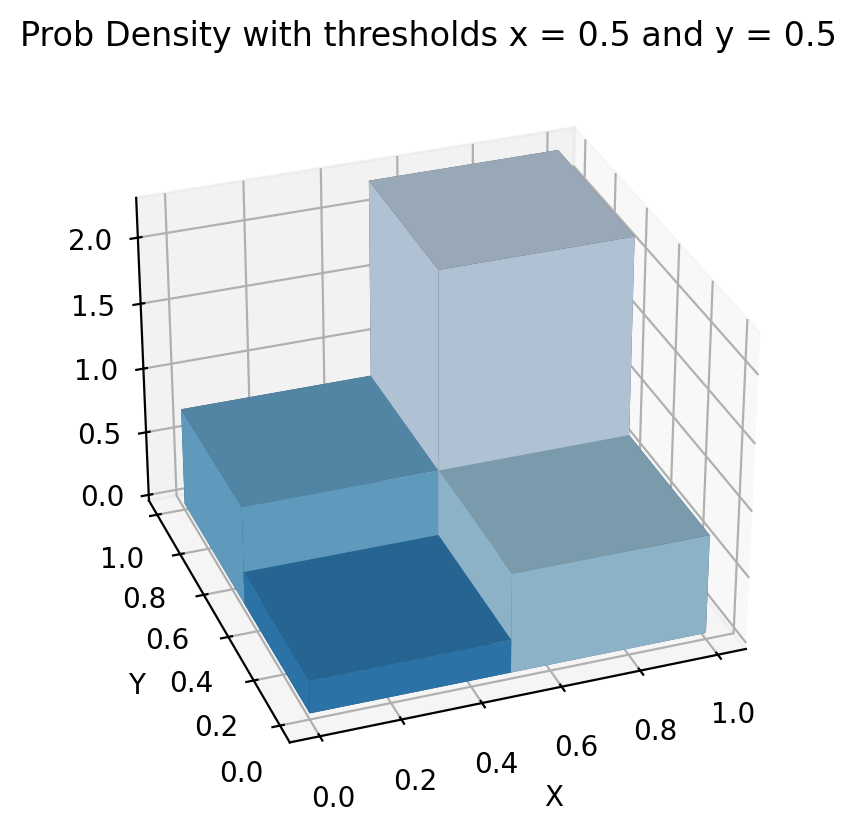

In [8]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Polygon
from matplotlib.patches import Circle, PathPatch
import mpl_toolkits.mplot3d.art3d as art3d
import matplotlib as mpl
%matplotlib inline

def visualise_joint_probability(xthreshold, ythreshold):
    fig = plt.figure()
    axis = fig.add_subplot(projection = '3d')
    
    x = xthreshold
    y = ythreshold
    
    xcoord = [0, 0, x, x ]
    ycoord = [0, y, 0, y ]
    widthx = [x, x, 1-x, 1-x]
    widthy = [ y, 1-y, y, 1-y]
    
    bottom = [0, 0, 0, 0]
    height = [x*y , x*(1+y), (1+x)*y, (1+x)*(1+y)]
    
    colours = mpl.color_sequences['tab20c']

    axis.bar3d(xcoord, ycoord, bottom, widthx, widthy, height, shade=True, color = colours[0:4])
    
    axis.set_title(f'Prob Density with thresholds x = {x} and y = {y}')
    axis.set_xlabel("X")
    axis.set_ylabel("Y")

    plt.rcParams["figure.dpi"] = 180
    axis.view_init(azim = 250)
    plt.show()


visualise_joint_probability(0.5 , 0.5)

A threshold value of $(x, y) = (\frac{1}{2}, \frac{1}{2})$ gives the maximum chance that both $X$ and $Y$ exceed a half. As calculated earlier, the value of $x = 0.618034$ produces the maximum probability of the event $(X>Y)$.

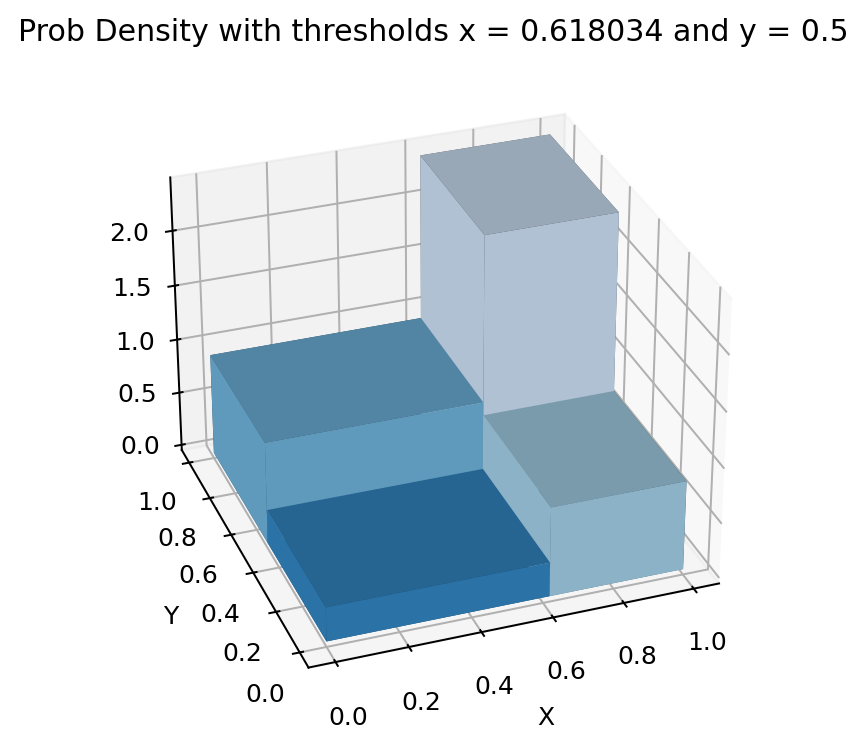

In [9]:
visualise_joint_probability(0.618034, 0.5)

The calculation performed in this section is actually integrating the volume of this graph "below" the surface $X= Y$, or more precisely on the set $\lbrace (u,v,w) \in \mathbb{R}^3 : v  \leq u \rbrace$.

## Simulating the theoretical optimum